<a href="https://colab.research.google.com/github/suman111999/Census-Income-Analysis-and-Classification/blob/main/Census_Income_Analysis_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**choose GPU**

In [4]:
from IPython.display import HTML
from subprocess import getoutput as gop
s = gop('nvidia-smi')
if 'P100' in s:
  gpu = 'P100'
elif 'T4' in s:
  gpu = 'T4'
elif 'K80' in s:
  gpu = 'K80'
display(HTML(f"<h1>{gpu}</h1>"))

In [5]:
!nvidia-smi

Mon Jan 18 20:09:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Libraries Required**

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

**Reading The File**

In [7]:
col_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race',
            'sex','capital-gain','capital-loss','hours-per-week','native-country','income']

df_train = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",names = col_names)
df_test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",names = col_names)

**Getting count of instances in Train Dataset**

In [8]:
df_train.shape

(32561, 15)

**Getting count of instances in Test Dataset**

In [9]:
df_test.shape

(16282, 15)

**Displaying the top 5 records from the Train dataset**

In [10]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Displaying the top 5 records from the Test dataset**

In [11]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


**Removing unwanted row in the test**

In [12]:
df_test=df_test[1:]
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


**Resetting the Indexes**

In [13]:
df_test.reset_index(drop=True,inplace=True)
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


**Handling the Missing values** 

In [14]:
df_train.replace(to_replace = ' ?',value=np.nan,inplace = True)
df_test.replace(to_replace = ' ?',value=np.nan,inplace = True)
df_test.replace(to_replace = ' <=50K.',value=' <=50K',inplace = True)
df_test.replace(to_replace = ' >50K.',value=' >50K',inplace = True)
df_test.replace(to_replace = 'Private',value=' Private',inplace = True)

In [15]:
df_train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [16]:
df_test.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

**Dropping the rows which contains at least one attribute having NaN values**

In [17]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [18]:
df_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [19]:
df_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

**Now,number of instances in training set**

In [20]:
df_train.shape

(30162, 15)

**Random Sampling**

In [21]:
df_train[df_train.income == ' <=50K'].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,22654.000000,2.265400e+04,22654.000000,22654.000000,22654.000000,22654.000000
mean,36.608060,1.903386e+05,9.629116,148.893838,53.448000,39.348592
std,13.464631,1.065713e+05,2.413596,936.392280,310.270263,11.950774
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,26.000000,1.173120e+05,9.000000,0.000000,0.000000,38.000000
50%,34.000000,1.795085e+05,9.000000,0.000000,0.000000,40.000000
75%,45.000000,2.394390e+05,10.000000,0.000000,0.000000,40.000000
max,90.000000,1.484705e+06,16.000000,41310.000000,4356.000000,99.000000


In [22]:
random_sample1 = df_train[df_train.income == ' <=50K'].sample(n = 8000,replace = False,random_state = 0)
random_sample2 = df_train[df_train.income == ' >50K'].copy()
new_train = pd.concat([random_sample1,random_sample2])

In [23]:
new_train = new_train.sample(frac = 1).reset_index(drop=True)
new_test = df_test.copy()

**Output of the shuffled Sample**

In [24]:
new_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,177305,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
1,33,Private,169973,Assoc-voc,11,Separated,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,62,Private,211035,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,30,United-States,>50K
3,40,Private,572751,Prof-school,15,Married-civ-spouse,Craft-repair,Husband,White,Male,5178,0,40,Mexico,>50K
4,50,Private,172052,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,35,South,>50K


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2e8ea5438>,
      dtype=object)

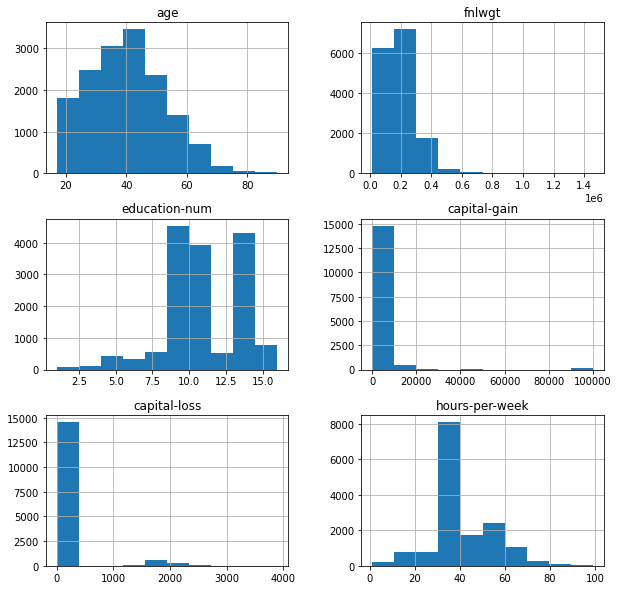

In [25]:
num_attributes = new_train.select_dtypes(include=['int64'])
num_attributes.hist(figsize=(10,10))

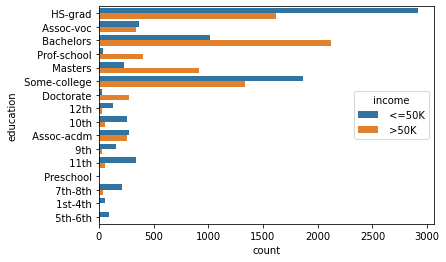

In [26]:
cat_attributes = new_train.select_dtypes(include=['object'])
sns.countplot(y='education', hue='income', data = cat_attributes)

**Encoding the Categorical Attributes**

In [27]:
labels = list(cat_attributes.columns)
from sklearn.preprocessing import LabelEncoder
for i in labels:
    le = LabelEncoder()
    le.fit(new_train[i])
    new_train[i] = le.transform(new_train[i])
    new_test[i] = le.transform(new_test[i])

**Heat map for Feature Selection**

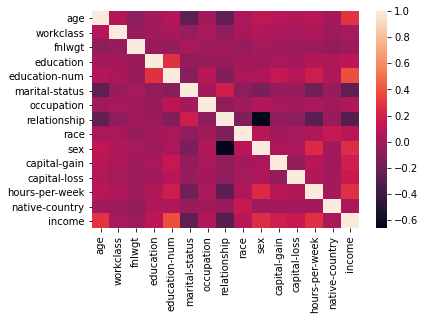

In [28]:
sns.heatmap(new_train.corr())

**selecting features**

In [29]:
X_train = new_train.drop(['income','fnlwgt'], axis =1)
Y_train = new_train['income']

In [30]:
X_test = new_test.drop(['income','fnlwgt'], axis =1)
Y_test = new_test['income']

**Applying Random Forest**

In [31]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(n_estimators=100,bootstrap=True,random_state=0)
model_1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [32]:
pred_randfor = model_1.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_randfor, Y_test.values)

0.8059760956175299

**confusion matrix**

In [34]:
confusion_matrix(pred_randfor, Y_test.values)

array([[9147,  709],
       [2213, 2991]])

Text(33.0, 0.5, 'Actual classes')

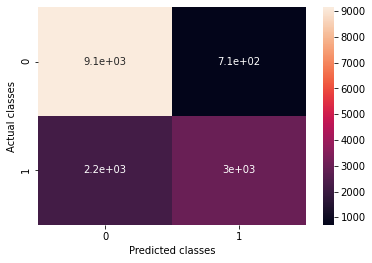

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cfm = confusion_matrix(pred_randfor, Y_test.values)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')


In [45]:
a=classification_report(Y_test,pred_randfor)
print(a)

              precision    recall  f1-score   support

           0       0.93      0.81      0.86     11360
           1       0.57      0.81      0.67      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.81      0.77     15060
weighted avg       0.84      0.81      0.82     15060



**Applying Cross Validation**

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_1, X_train, 
         Y_train, cv=5)
print(np.mean(scores))

0.81248319264745


**Tunning:Applying RandomSearch**

In [37]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [38]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = model_1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 35.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [39]:
rf_random.best_score_

0.828604440073797

In [40]:
pred_randfor1 =rf_random.predict(X_test)

In [41]:
confusion_matrix(pred_randfor1, Y_test.values)

array([[9140,  555],
       [2220, 3145]])

In [46]:
b=classification_report(Y_test,pred_randfor1)
print(b)

              precision    recall  f1-score   support

           0       0.94      0.80      0.87     11360
           1       0.59      0.85      0.69      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.83      0.78     15060
weighted avg       0.86      0.82      0.83     15060



Text(33.0, 0.5, 'Actual classes')

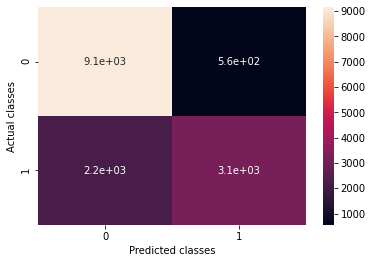

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cfm = confusion_matrix(pred_randfor1, Y_test.values)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')